## Car Price Prediction Regression Projects

Projects Goal

Predict the price of a Car by its features. If you are a buyer or seller of the car but you do not know the exact price of the car, so supervised machine learning regression algorithms can help you to predict the price of the car just providing features of the target car

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car = pd.read_csv('quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
car.shape

(892, 6)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
backup=car.copy()

## Data cleaning

year columns has non-year values

In [6]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
car=car[car['year'].str.isnumeric()]

year is in object. Change to integer

In [8]:
car['year']=car['year'].astype(int)

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [10]:
car['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object>

price columns has Ask For Price and price  has comma and is in object

In [11]:
car=car[car['Price']!='Ask For Price']

In [12]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


kms_driven has object values with kms at last.

In [14]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [15]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

kms_driven has na_value and two rows has petrol. 

In [16]:
car=car[car['kms_driven'].str.isnumeric()]

In [17]:
car.shape

(817, 6)

In [18]:
car['kms_driven']=car['kms_driven'].astype(int)

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [20]:
car['fuel_type'].isnull().sum()

1

fuel_type has na_values

In [21]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [22]:
car=car[~car['fuel_type'].isna()]

In [23]:
car.shape

(816, 6)

## changing car name keeping only first three name

In [24]:
car['name']=car['name'].str.split().str.slice(0,3).str.join(' ')

In [25]:
car['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [26]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [27]:
car['Price'].max()

8500003

In [28]:
car=car[car['Price']<6000000]

In [29]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.0+ KB


checking Relationship

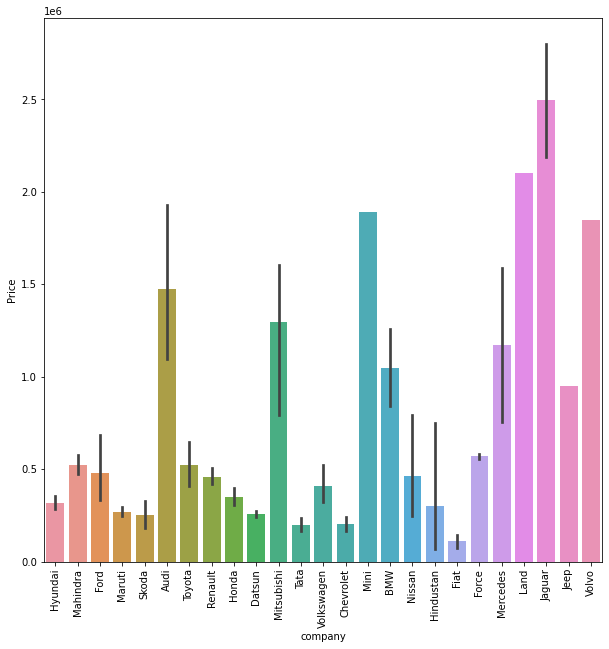

In [30]:
plt.subplots(figsize=(10,10))
sns.barplot(x='company',y='Price',data=car)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

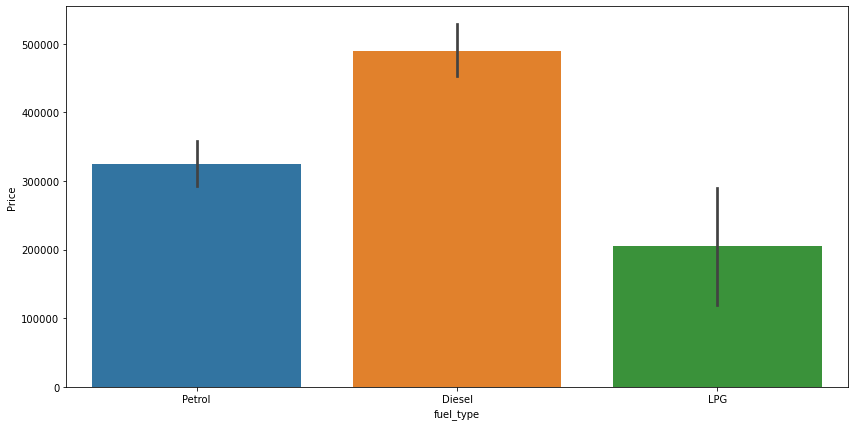

In [31]:
plt.subplots(figsize=(14,7))
sns.barplot(x='fuel_type',y='Price',data=car)

<function matplotlib.pyplot.show(close=None, block=None)>

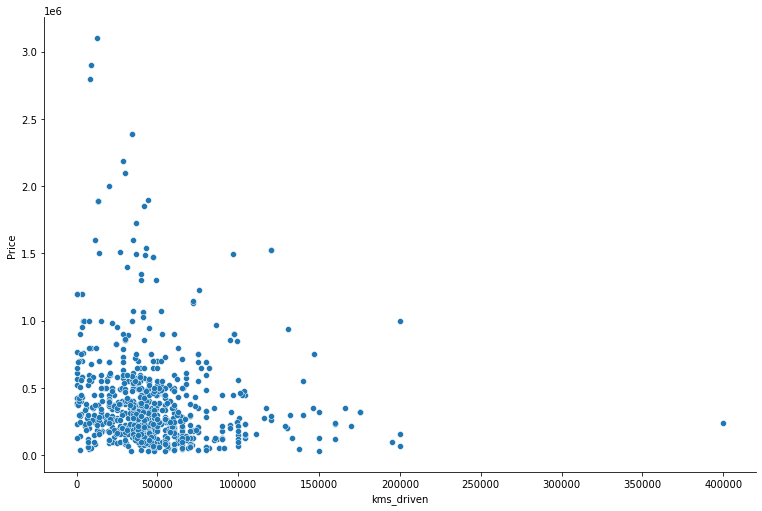

In [32]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)
plt.show

<AxesSubplot:xlabel='kms_driven', ylabel='Price'>

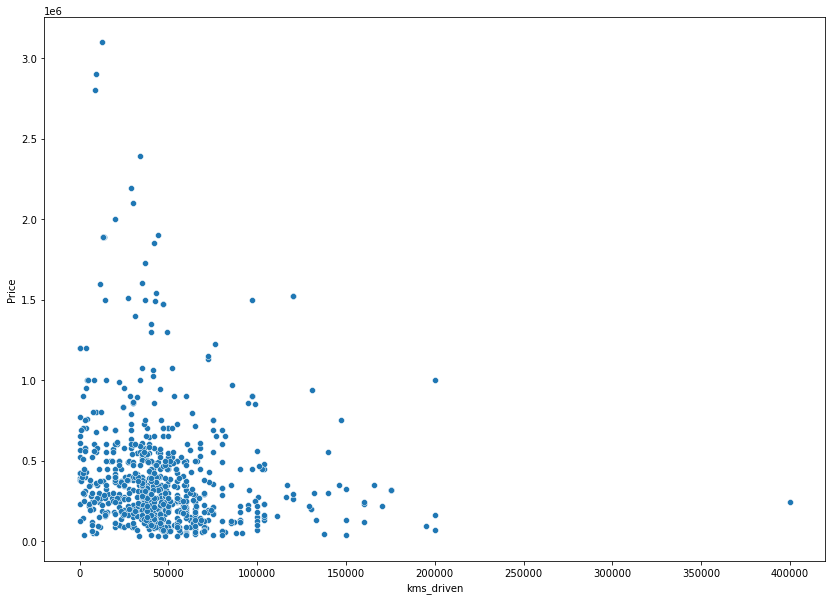

In [33]:
plt.subplots(figsize=(14,10))
sns.scatterplot(x=car['kms_driven'],y=car['Price'])

In [34]:
car.corr()['Price']

year          0.347764
Price         1.000000
kms_driven   -0.149621
Name: Price, dtype: float64

In [35]:
car=car.reset_index()

# Extracting Training Data

In [36]:
X=car.drop(columns=['Price'])
y=car['Price']

## Applying Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=655)

## Model Creating

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

# Creating an OneHotEncoder object to contain all the possible categories

In [40]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [41]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')


Linear Regression model

In [42]:
lr=LinearRegression()

Meaking pipline

In [43]:
pipe=make_pipeline(column_trans,lr)

In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [45]:
y_pred=pipe.predict(X_test)

In [46]:
r2_score(y_test,y_pred)

0.748959183331489

In [47]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [48]:
np.argmax(scores)

655

In [49]:
scores[np.argmax(scores)]

0.9246388888590454

In [50]:
#pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

### Exporting the Model

In [51]:
import pickle

pickle.dump(car,open('car.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [52]:
car

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
810,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,888,Tata Zest XM,Tata,2018,260000,27000,Diesel
